In [1]:
# terminal/zsh/cmd command
# pip
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('favorite_music_dataset.csv')

df.head()

,Song_Title,Artist,Genre,Release_Year,Duration_Minutes,Listened_Date,Platform
0,Faded,Alan Walker,Electronic,2024,4.02,2024-02-10,Apple Music
1,Blinding Lights,The Weeknd,Synth-pop,2018,4.45,2024-05-30,Zing MP3
2,Faded,Alan Walker,Electronic,2024,4.86,2024-05-07,Zing MP3
3,Faded,Alan Walker,Electronic,2012,4.92,2024-03-19,YouTube
4,Bohemian Rhapsody,Queen,Rock,2023,3.90,2024-01-16,Apple Music


In [3]:
import tensorflow as tf
train_df = df.sample(frac=0.75, random_state=4)

val_df = df.drop(train_df.index)

In [5]:
numerical_cols = train_df.select_dtypes(include=np.number).columns

max_val = train_df[numerical_cols].max(axis=0)
min_val = train_df[numerical_cols].min(axis=0)

range_val = max_val - min_val
train_df[numerical_cols] = (train_df[numerical_cols] - min_val) / range_val
val_df[numerical_cols] = (val_df[numerical_cols] - min_val) / range_val

In [14]:
# One-hot encode the target variable
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

# Align columns of X_val_encoded with X_train_encoded
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Align columns of y_val_encoded with y_train_encoded
y_val_encoded = y_val_encoded.reindex(columns=y_train_encoded.columns, fill_value=0)

# Convert boolean columns to integers
X_train_encoded = X_train_encoded.astype(int)
X_val_encoded = X_val_encoded.astype(int)
y_train_encoded = y_train_encoded.astype(int)
y_val_encoded = y_val_encoded.astype(int)

# Train the model
losses = model.fit(X_train_encoded, y_train_encoded,
                   validation_data=(X_val_encoded, y_val_encoded),
                   batch_size=256,
                   epochs=15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step - accuracy: 0.2933 - loss: 2.4816 - val_accuracy: 0.4000 - val_loss: 2.5377
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.3333 - loss: 2.4531 - val_accuracy: 0.4000 - val_loss: 2.5202
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.3600 - loss: 2.4247 - val_accuracy: 0.4000 - val_loss: 2.5030
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.3867 - loss: 2.3963 - val_accuracy: 0.4000 - val_loss: 2.4857
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.4133 - loss: 2.3683 - val_accuracy: 0.4000 - val_loss: 2.4685
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.4133 - loss: 2.3407 - val_accuracy: 0.3600 - val_loss: 2.4511
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.4267 - loss: 2.3130 - val_accuracy: 0.3200 - val_loss: 2.4335
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.4267 - loss: 2.2852 - val_accuracy: 0.3200 - val_loss:

In [6]:
X_train = train_df.drop('Genre', axis=1)
X_val = val_df.drop('Genre', axis=1)
y_train = train_df['Genre']
y_val = val_df['Genre']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]

print("Input shape:", input_shape)

Input shape: [6]


In [7]:
categorical_cols = X_train.select_dtypes(include='object').columns

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

print("Shape of X_train after encoding:", X_train_encoded.shape)
print("Shape of X_val after encoding:", X_val_encoded.shape)

Shape of X_train after encoding: (75, 99)
Shape of X_val after encoding: (25, 56)


In [8]:
# Determine the number of unique genres
num_genres = len(y_train.unique())
print("Number of unique genres:", num_genres)

# Update input shape based on the encoded features
input_shape_encoded = [X_train_encoded.shape[1]]
print("Input shape after encoding:", input_shape_encoded)

Number of unique genres: 13
Input shape after encoding: [99]


In [9]:
#The input_shape needs to be passed to the first Dense layer as a tuple
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu',
                        input_shape=(input_shape_encoded[0],)), # Use input_shape_encoded and pass as a tuple
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_genres, activation='softmax') # Change units to num_genres and activation to softmax
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,901 (85.55 KB)

 Trainable params: 21,901 (85.55 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
              metrics=['accuracy']) # Add accuracy as a metric

In [15]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val_encoded.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.07303747, 0.1301601 , 0.0549599 , 0.07641023, 0.07186646,
        0.08161596, 0.09890869, 0.06139131, 0.06827106, 0.06919251,
        0.06497487, 0.08487798, 0.06433336],
       [0.06669103, 0.08132254, 0.06838076, 0.07842188, 0.06444556,
        0.07907078, 0.10523402, 0.07498945, 0.08540837, 0.07604805,
        0.06124859, 0.08000287, 0.07873605],
       [0.07663144, 0.133595  , 0.05671588, 0.07230071, 0.07182567,
        0.07680174, 0.10503727, 0.0653431 , 0.0723564 , 0.06281303,
        0.05524619, 0.09133931, 0.05999419]], dtype=float32)

In [16]:
display(y_val.iloc[0:3])

,Genre
0,Electronic
1,Synth-pop
3,Electronic


<Axes: >

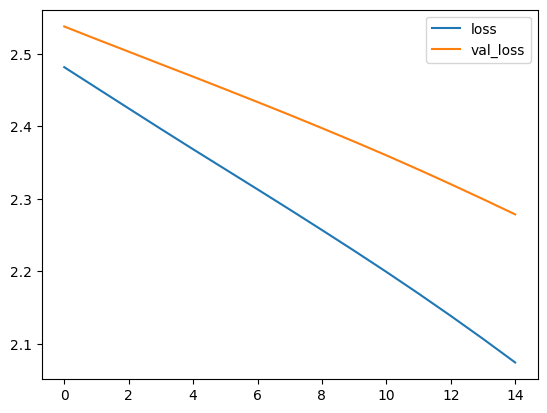

In [17]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()